# Energy production Forecasting for Optimal Resource Management

## Data Understanding

In [1]:
# We start by importing all the neccesary python libraries we will use
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IPG2211A2N.csv')
df

,DATE,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609
...,...,...
1013,2023-06-01,100.5357
1014,2023-07-01,116.8435
1015,2023-08-01,117.3385
1016,2023-09-01,103.5618


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1018 non-null   object 
 1   IPG2211A2N  1018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [4]:
df.sample(10)

,DATE,IPG2211A2N
745,2001-02-01,95.9400
238,1958-11-01,17.7877
382,1970-11-01,40.3268
952,2018-05-01,93.0757
302,1964-03-01,26.8725
307,1964-08-01,29.6208
18,1940-07-01,3.8680
711,1998-04-01,75.8325
277,1962-02-01,23.7170
425,1974-06-01,46.4048


In [5]:
df.tail(14)

,DATE,IPG2211A2N
1004,2022-09-01,100.8261
1005,2022-10-01,91.1027
1006,2022-11-01,100.1500
1007,2022-12-01,119.2465
1008,2023-01-01,116.0802
1009,2023-02-01,106.2716
1010,2023-03-01,104.6226
1011,2023-04-01,89.8139
1012,2023-05-01,91.8044
1013,2023-06-01,100.5357


In [6]:
df.describe()

,IPG2211A2N
count,1018.000000
mean,56.242813
std,35.778253
min,3.333600
25%,20.523325
50%,56.524650
75%,89.281275
max,126.373300


In [7]:
# Check for missing values
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

In [9]:
# Cleaning up the dataset by renaming columns
df.columns = ['Date', 'Energy_prod']
df.head()

,Date,Energy_prod
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609


In [10]:
#Convert Date into Datetime
df['Date'] =pd.to_datetime(df['Date'])
df.head()

,Date,Energy_prod
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1018 non-null   datetime64[ns]
 1   Energy_prod  1018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.0 KB


In [12]:
# Set Date As the index
df.set_index('Date', inplace = True)
df.head()

,Energy_prod
Date,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-05-01,3.4609


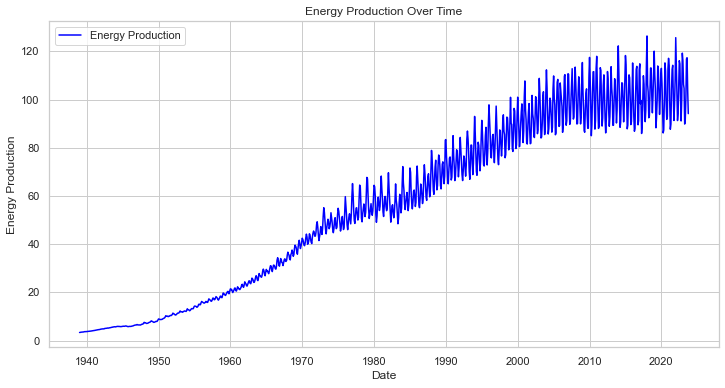

In [13]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Energy_prod', data=df, label='Energy Production', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time')
plt.legend()

# Show the plot
plt.show()

In [14]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [15]:
# ho: It is non stationary
# h1: It is stationary
def adfuller_test(Energy_prod):
    result = adfuller(Energy_prod)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Reject the null hypothesis')
    else:
        print('Data is non stationary')

In [16]:
adfuller_test(df['Energy_prod'])

ADF Test Statistic : -0.7063953739576894
p-value : 0.8450860298860234
#Lags Used : 22
Number of Observations Used : 995
Data is non stationary


As you can see our data is non stationary because our p-value is grarer than 0.05.

## Differencing

In [17]:
df['Energy_prod First Difference'] = df['Energy_prod'] - df['Energy_prod'].shift(1)

In [18]:
df['Energy_prod'].shift(1)

Date
1939-01-01         NaN
1939-02-01      3.3336
1939-03-01      3.3591
1939-04-01      3.4354
1939-05-01      3.4609
                ...   
2023-06-01     91.8044
2023-07-01    100.5357
2023-08-01    116.8435
2023-09-01    117.3385
2023-10-01    103.5618
Name: Energy_prod, Length: 1018, dtype: float64

In [19]:
df['Seasonal First Difference'] = df['Energy_prod'] - df['Energy_prod'].shift(12)

In [20]:
df.head(14)

,Energy_prod,Energy_prod First Difference,Seasonal First Difference
Date,,,
1939-01-01,3.3336,NaN,NaN
1939-02-01,3.3591,0.0255,NaN
1939-03-01,3.4354,0.0763,NaN
1939-04-01,3.4609,0.0255,NaN
1939-05-01,3.4609,0.0000,NaN
1939-06-01,3.5117,0.0508,NaN
1939-07-01,3.5117,0.0000,NaN
1939-08-01,3.5626,0.0509,NaN
1939-09-01,3.6644,0.1018,NaN


In [21]:
df.tail(14)

,Energy_prod,Energy_prod First Difference,Seasonal First Difference
Date,,,
2022-09-01,100.8261,-13.9931,0.3138
2022-10-01,91.1027,-9.7234,-0.1975
2022-11-01,100.1500,9.0473,2.3013
2022-12-01,119.2465,19.0965,11.2619
2023-01-01,116.0802,-3.1663,-9.5907
2023-02-01,106.2716,-9.8086,-7.4486
2023-03-01,104.6226,-1.6490,2.1695
2023-04-01,89.8139,-14.8087,-1.4551
2023-05-01,91.8044,1.9905,-2.4032


In [22]:
# Test the dickey fuller test again
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.851589931882616
p-value : 1.567618327716728e-14
#Lags Used : 12
Number of Observations Used : 993
Reject the null hypothesis


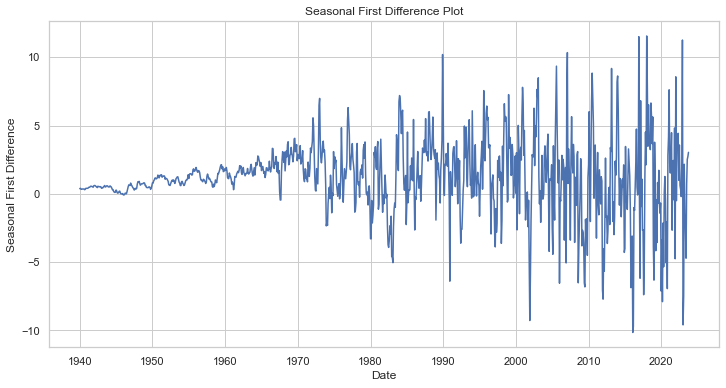

In [23]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Seasonal First Difference', data=df)
plt.title('Seasonal First Difference Plot')
plt.xlabel('Date')
plt.ylabel('Seasonal First Difference')
plt.show()

### ARIMA Model

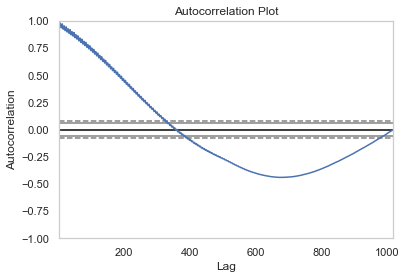

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Energy_prod'])
plt.title('Autocorrelation Plot')
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

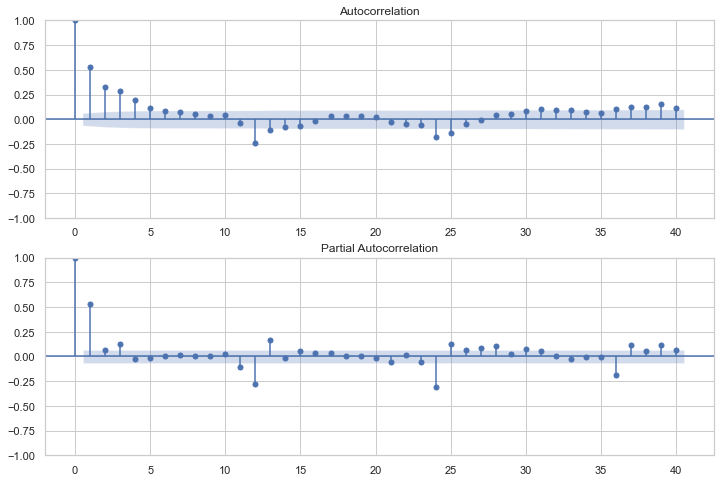

In [26]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40, ax=ax2)

In [27]:
# for non seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Energy_prod'], order = (1,1,1))
model_fit = model.fit()

In [29]:
# Fit the ARIMA model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Energy_prod   No. Observations:                 1018
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3075.532
Date:                Mon, 04 Dec 2023   AIC                           6157.065
Time:                        21:43:33   BIC                           6171.839
Sample:                    01-01-1939   HQIC                          6162.675
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0753      0.041      1.848      0.065      -0.005       0.155
ma.L1          0.4932      0.033     15.003      0.000       0.429       0.558
sigma2        24.7794      0.749     33.082      0.000      23.311      26.247
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               271.30
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):             310.83   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

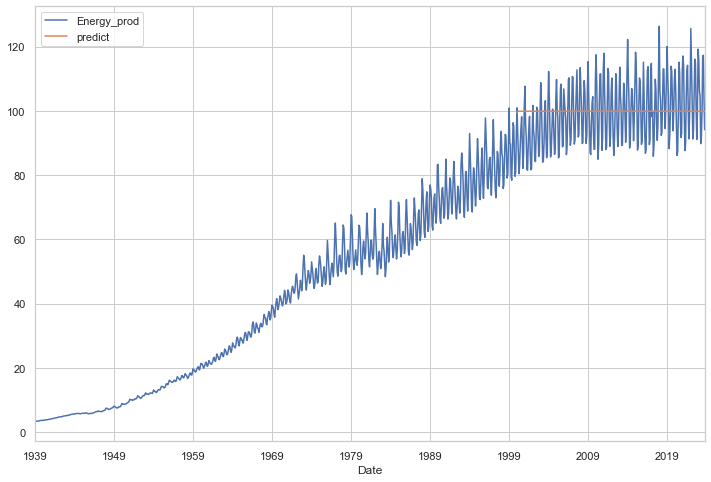

In [30]:
# After fitting the ARIMA model (model_fit)
start_date = '2000-01-01'  # Replace with your actual start date
end_date = '2023-12-31'
prediction = model_fit.get_prediction(start=start_date, end=end_date, dynamic=True)

# Extract the predicted values
df['predict'] = prediction.predicted_mean

# Plot the actual vs predicted values
df[['Energy_prod', 'predict']].plot(figsize=(12, 8))
plt.show()

In [31]:
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
forecast

2023-11-01    91.742691
2023-12-01    91.561998
2024-01-01    91.548391
2024-02-01    91.547367
2024-03-01    91.547290
2024-04-01    91.547284
2024-05-01    91.547284
2024-06-01    91.547283
2024-07-01    91.547283
2024-08-01    91.547283
Freq: MS, Name: predicted_mean, dtype: float64

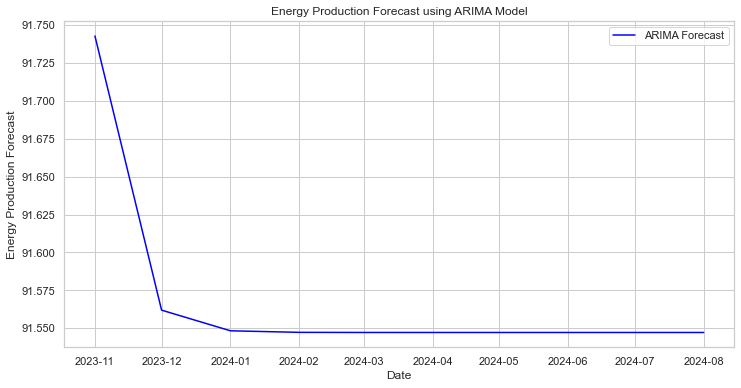

In [32]:
# You can replace it with your actual variable name
arima_predictions = model_fit.get_prediction(start='2023-11-01', end='2024-08-01', dynamic=True).predicted_mean

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(arima_predictions, label='ARIMA Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Production Forecast')
plt.title('Energy Production Forecast using ARIMA Model')
plt.legend()
plt.show()

### Using SARIMA

In [33]:
model = sm.tsa.statespace.SARIMAX(df['Energy_prod'], order = (1,1,1), seasonal_order = (1,1,1,12))
results = model.fit()

In [ ]:

# Summary of the SARIMA model
print(results.summary())

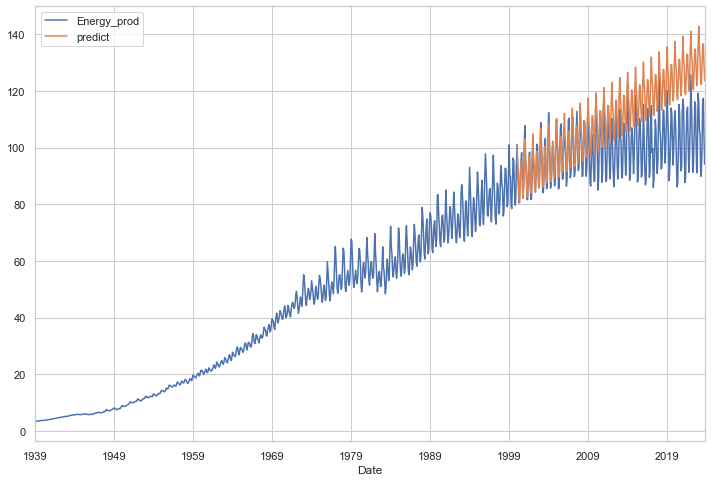

In [34]:
# After fitting the ARIMA model (model_fit)
# Make predictions
start_date = '2000-01-01'  # Replace with your actual start date
end_date = '2023-12-31'  # Replace with your actual end date
prediction = results.get_prediction(start=start_date, end=end_date, dynamic=True)

# Extract the predicted values
df['predict'] = prediction.predicted_mean

# Plot the actual vs predicted values
df[['Energy_prod', 'predict']].plot(figsize=(12, 8))
plt.show()

In [35]:
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)
forecast

2023-11-01     99.788815
2023-12-01    114.892521
2024-01-01    120.536000
2024-02-01    110.853889
2024-03-01    103.648607
2024-04-01     91.079770
2024-05-01     93.282665
2024-06-01    103.878685
2024-07-01    116.521816
2024-08-01    116.047010
Freq: MS, Name: predicted_mean, dtype: float64

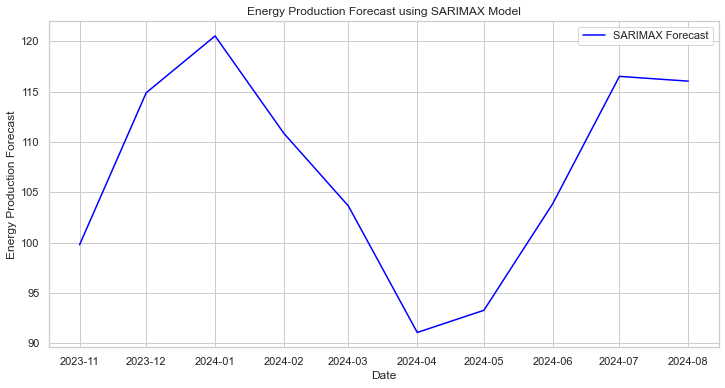

In [36]:
# You can replace it with your actual variable name
forecasted_mean = results.get_forecast(steps=10).predicted_mean

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecasted_mean, label='SARIMAX Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Production Forecast')
plt.title('Energy Production Forecast using SARIMAX Model')
plt.legend()
plt.show()

## PMDARIMA( auto ARIMA)